In [10]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [11]:
x = np.load('yale_data.npy')
y = np.load('yale_target.npy')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3)

In [12]:

nof_prin_components = 500

# read about whitening

pca = PCA(n_components=nof_prin_components, whiten=True)
pca.fit(x_train)

singular_values = pca.singular_values_
eigenvalues = singular_values**2
eigenvalues[0]
# pca.explained_variance_ratio_

7381702470.693858

In [13]:
pca.explained_variance_

array([7.38909156e+06, 4.78069980e+06, 1.03241588e+06, 4.99519629e+05,
       3.65543080e+05, 2.48224039e+05, 2.13055611e+05, 1.95849897e+05,
       1.47030654e+05, 1.42066001e+05, 1.28682025e+05, 1.13827085e+05,
       1.03891908e+05, 9.88911463e+04, 8.96067762e+04, 7.89192704e+04,
       7.28175041e+04, 6.55611606e+04, 6.42469665e+04, 5.97892905e+04,
       5.45975539e+04, 5.30588135e+04, 5.15712667e+04, 4.71894206e+04,
       4.48001952e+04, 4.26472178e+04, 4.01925304e+04, 3.79665274e+04,
       3.56132871e+04, 3.40609283e+04, 3.36061322e+04, 3.10841698e+04,
       2.92100011e+04, 2.87965522e+04, 2.75050974e+04, 2.62342192e+04,
       2.57584793e+04, 2.45716474e+04, 2.39547890e+04, 2.31335992e+04,
       2.24779314e+04, 2.20772228e+04, 2.05861368e+04, 2.01770117e+04,
       1.92783474e+04, 1.86558946e+04, 1.82973758e+04, 1.79621372e+04,
       1.71593490e+04, 1.67858372e+04, 1.60681665e+04, 1.54117829e+04,
       1.48956259e+04, 1.47047170e+04, 1.42007438e+04, 1.38732773e+04,
      

Here the first eigen value 7.23006022e+09 represents the level of variation explained by the associated principal component. 

In [14]:
cum_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
np.sum(pca.explained_variance_ratio_)

0.9987697979689785

In [15]:
n_components = np.argmax(cum_variance_ratio >= 0.95) + 1
n_components

49

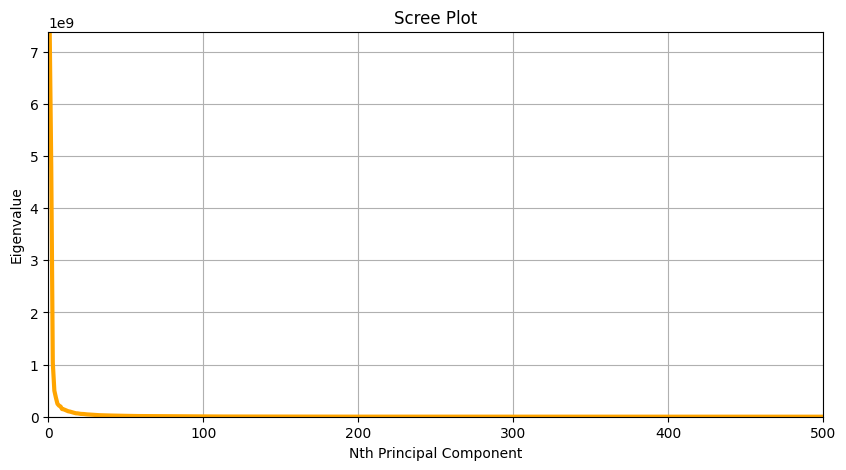

In [16]:
# Using Scree Plot to visualize the eigenvalues obtained from PCA.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, linewidth=3, color='orange')
plt.title('Scree Plot')
plt.xlabel('Nth Principal Component')
plt.ylabel('Eigenvalue')
plt.xlim(0, nof_prin_components)
plt.ylim(0, np.max(eigenvalues))
plt.grid(True)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_18636\60457419.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


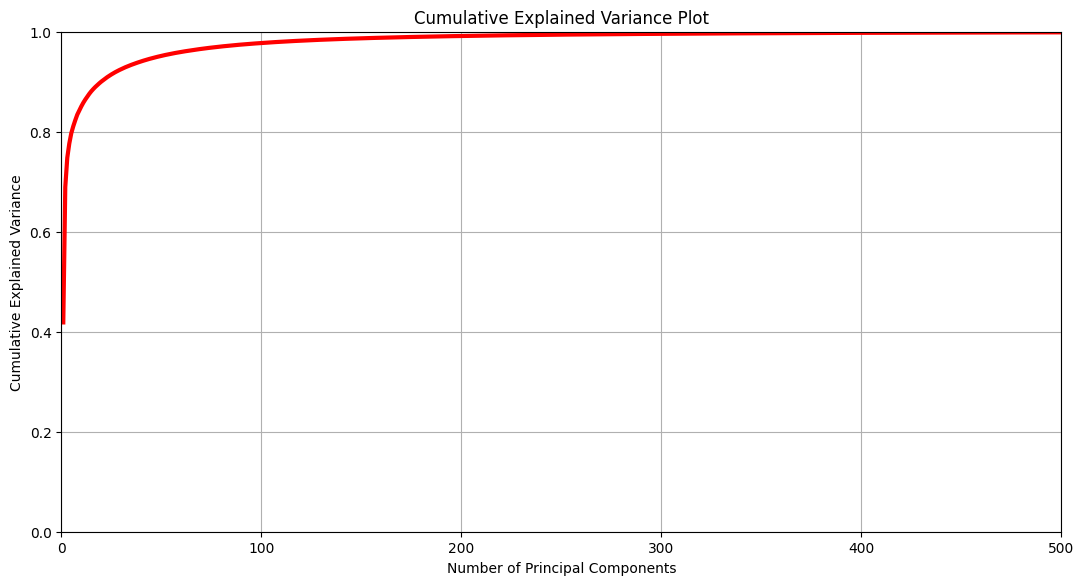

In [17]:

fig = plt.figure(figsize=(10, 5))
axes = fig.add_axes((0, 0, 1, 1))
axes.plot(range(1, len(cum_variance_ratio) + 1), cum_variance_ratio, linewidth=3, color='red')
axes.set_xlabel('Number of Principal Components')
axes.set_ylabel('Cumulative Explained Variance')
axes.set_xlim(0, len(cum_variance_ratio))
axes.set_ylim(0, 1)
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)
fig.show()

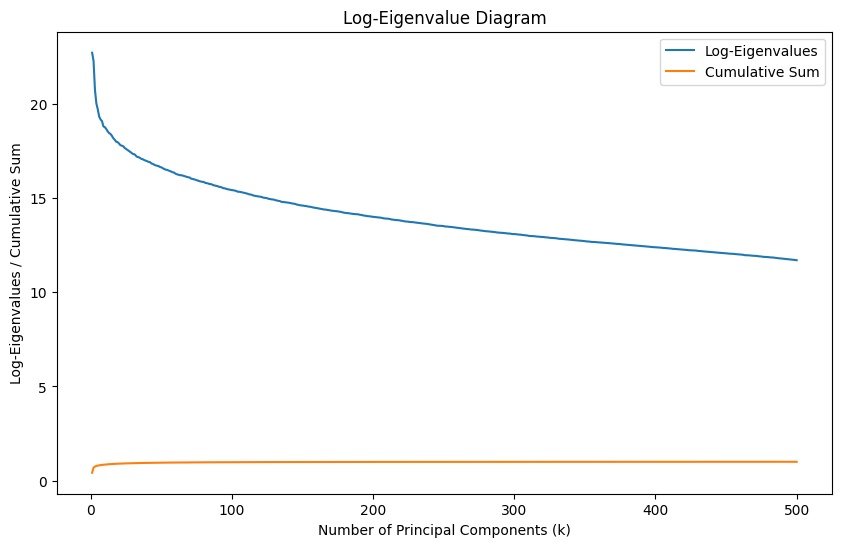

In [18]:
log_eigenvalues = np.log(eigenvalues)
cumulative_sum = np.cumsum(eigenvalues)

# Plot log-eigenvalue diagram
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(log_eigenvalues) + 1), log_eigenvalues, label='Log-Eigenvalues')
plt.plot(range(1, len(cumulative_sum) + 1), cumulative_sum / np.sum(eigenvalues), label='Cumulative Sum')
plt.title('Log-Eigenvalue Diagram')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Log-Eigenvalues / Cumulative Sum')
plt.legend()
plt.show()